In [ ]:
#QUIN F PRACTICE

Linear Regression is a popular machine learning model used in a variety of industries and use cases.

- Finance: Linear regression can be used in the finance industry to predict stock prices, currency exchange rates, and other financial data. By analyzing historical data, linear regression models can be used to make predictions about future market trends and help investors make more informed decisions.

- Marketing: Linear regression can be used in marketing to predict customer behavior, such as how much they are willing to spend on a particular product or service. This information can be used to develop more effective marketing campaigns and optimize pricing strategies.

- Healthcare: Linear regression can be used in healthcare to predict patient outcomes, such as the likelihood of a patient being readmitted to the hospital or the risk of developing a certain disease. This information can be used to develop personalized treatment plans and improve patient care.

- Manufacturing: Linear regression can be used in manufacturing to predict equipment failure rates and optimize maintenance schedules. By analyzing historical data on equipment performance, linear regression models can be used to identify patterns and predict when maintenance is most likely to be needed.

In this Linear Regression case study on Finance, the goal is to predict the future stock price of Tesla based on historical data. Here is a summary of the process involved:

##### Preparation (Domain knowledge):
- Identify the dataset and collect the relevant data.
- Define the problem statement and set the objective of the project.
- Determine the variables that will be used in the model.

##### Understanding of Data (Python + Domain knowledge):
- Perform exploratory data analysis to understand the characteristics of the data.
- Identify the patterns and trends in the data using statistical techniques.
- Determine if there is any missing or incomplete data.

##### Data Cleaning (Python):
- Remove any irrelevant data.
- Handle missing data by either removing or imputing.
- Handle any outliers in the data.

##### Data Visualization (Python + Visualization):
- Visualize the data to better understand the patterns and trends.
- Create plots and graphs to help identify relationships between the variables.

##### Data Transformation (Python + Domain knowledge):
- Perform any necessary transformations on the data, such as normalization, standardization or log transformations.

##### Creating New Features and Feature Selection (Python + Domain knowledge):
- Create new features from the existing data.
- Perform feature selection to identify the most relevant features for the model.

##### Building Basic Model (ML + Python):
- Build a basic Linear Regression model on the dataset.
- Evaluate the performance of the model using evaluation metrics such as mean squared error or R-squared.

##### Training & Evaluation (ML + Python):

- Split the data into training and testing sets.
- Train the model on the training data and evaluate its performance on the testing data.

##### Final ML Model (ML + Python):
- Select the best performing model and finalize it.
- Tune the hyperparameters of the model for better performance.

##### Next Steps (ML + Python + Domain knowledge):
- Use the model to make predictions on new data.
- Monitor the performance of the model over time.
- Refine the model as needed to improve its accuracy and performance.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### About Dataset

Context: TSLA has been on the rice recently, with a crazy +100% spike in the last 30 days alone. With the history, maybe we can find out why?

Content: EOD data for Tesla's stock from 2010 to 2020.

Acknowledgement: Data from https://finance.yahoo.com/quote/TSLA.


### <a name="data-source"></a>1. Understanding of Data (Python + Domain knowledge):
Some ways to exploratory data are given below:

    df.head()
    df.info()
    df.shape
    df.describe()

In [75]:
df = pd.read_csv(r"Tesla_stock_Price.csv")
df.head()

,Date,Close,Open,High,Low,Volume,Chg%
0,30-Jun-10,1.59,1.72,2.03,1.55,257.92M,0.00%
1,01-Jul-10,1.46,1.67,1.73,1.35,123.45M,-8.18%
2,02-Jul-10,1.28,1.53,1.54,1.25,77.13M,-12.33%
3,06-Jul-10,1.07,1.33,1.33,1.06,103.19M,-16.41%
4,07-Jul-10,1.05,1.09,1.11,1.00,103.87M,-1.87%


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3178 non-null   object 
 1   Close   3138 non-null   float64
 2   Open    3138 non-null   float64
 3   High    3138 non-null   float64
 4   Low     3138 non-null   float64
 5   Volume  3138 non-null   object 
 6   Chg%    3138 non-null   object 
dtypes: float64(4), object(3)
memory usage: 173.9+ KB


In [77]:
print(df.shape) 

(3178, 7)


In [78]:
print(df.describe())

             Close        Open         High          Low
count  3138.000000  3138.00000  3138.000000  3138.000000
mean     59.325800    59.35913    60.706995    57.884063
std      95.360721    95.45864    97.677975    92.980717
min       1.050000     1.08000     1.110000     1.000000
25%       8.822500     8.85500     9.022500     8.550000
50%      16.300000    16.31500    16.525000    16.030000
75%      25.292500    25.20000    25.657500    24.822500
max     409.970000   411.47000   414.500000   405.670000


In [79]:
# Data Cleaning 
#Handle Missing Values


# Fill missing values with the mean
df['Open'].fillna(df['Open'].mean(), inplace=True)
df['Close'].fillna(df['Close'].mean(), inplace=True)

In [80]:
#Dropping Rows with Any Missing Values

df.dropna(inplace=True)


In [81]:
# Ensure 'Date' is a datetime dtype and sort the DataFrame by 'Date'.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

/var/folders/6l/px4tgfq947b_1g8ky2xkrkgr0000gn/T/ipykernel_2996/2838458931.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [82]:
# If 'Volume' contains string values with 'M' or 'K', first convert these to the full numeric values.
# Ensure 'Volume' is treated as a string for the replace operation, then convert to numeric.
df['Volume'] = df['Volume'].astype(str).str.replace('M', 'e6').str.replace('K', 'e3', regex=True)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')


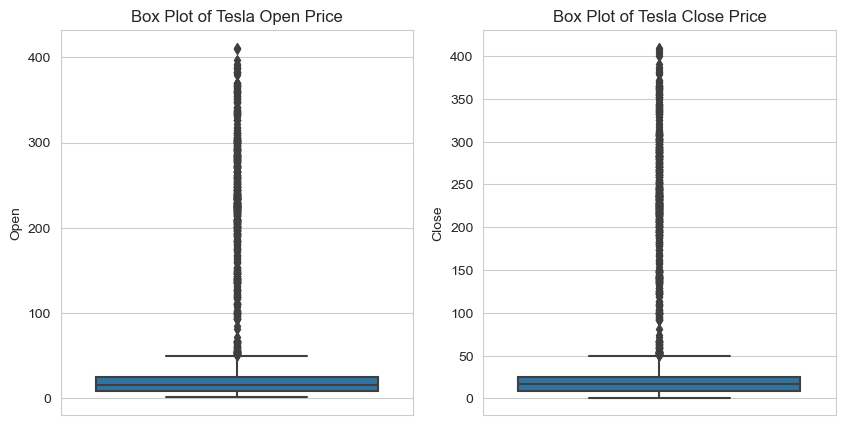

In [83]:
#Investigating Outliers

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Open'])
plt.title('Box Plot of Tesla Open Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Close'])
plt.title('Box Plot of Tesla Close Price')

plt.show()


#image below: shows two box plots representing the distribution of Tesla's stock Open and Close prices, respectively

### <a name="data-prep"></a>2. Data Visualization (Python + Visualization):
    1. Visualize the Open price data
    2. Visualize the closing price data

Some more questions to keep in mind:
- Any missing value?
- Any outliers?

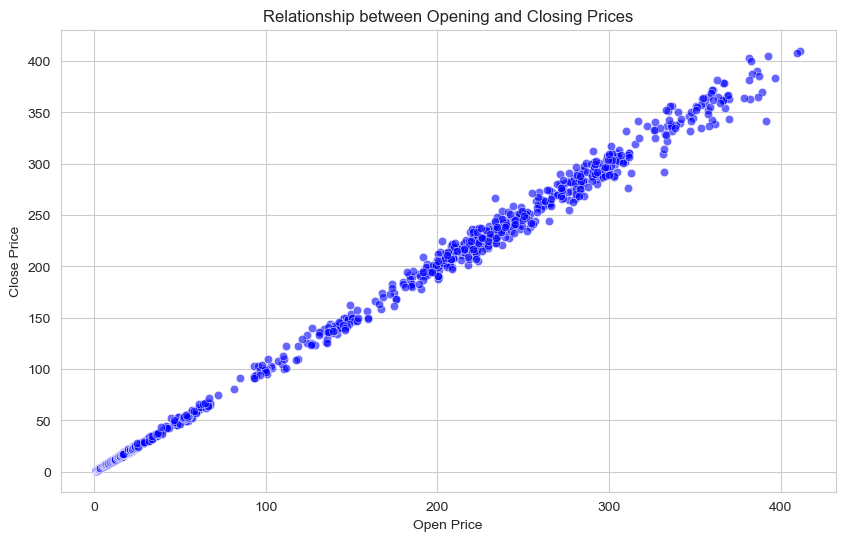

In [32]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualizing the relationship between Opening and Closing prices with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=df, color='blue', alpha=0.6)
plt.title('Relationship between Opening and Closing Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()


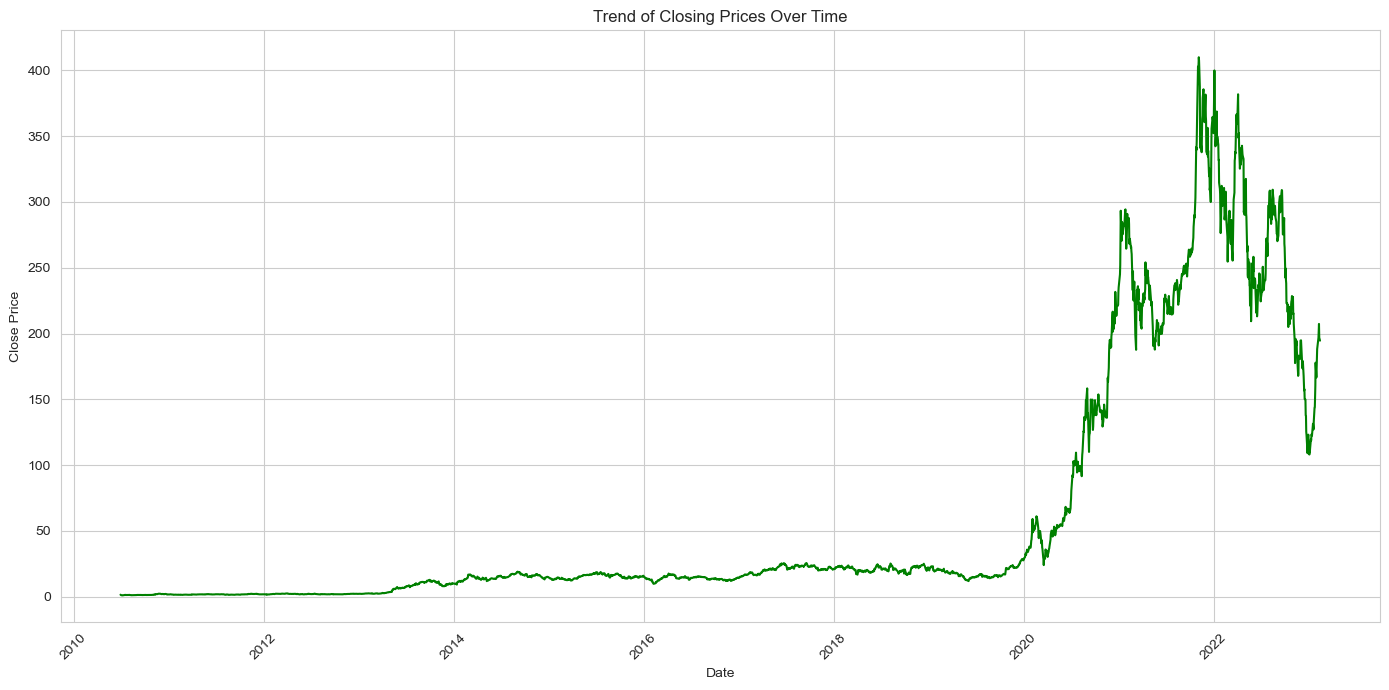

In [45]:



# Visualizing the trend of Closing prices over time with the corrected data.
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], color='green')
plt.title('Trend of Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

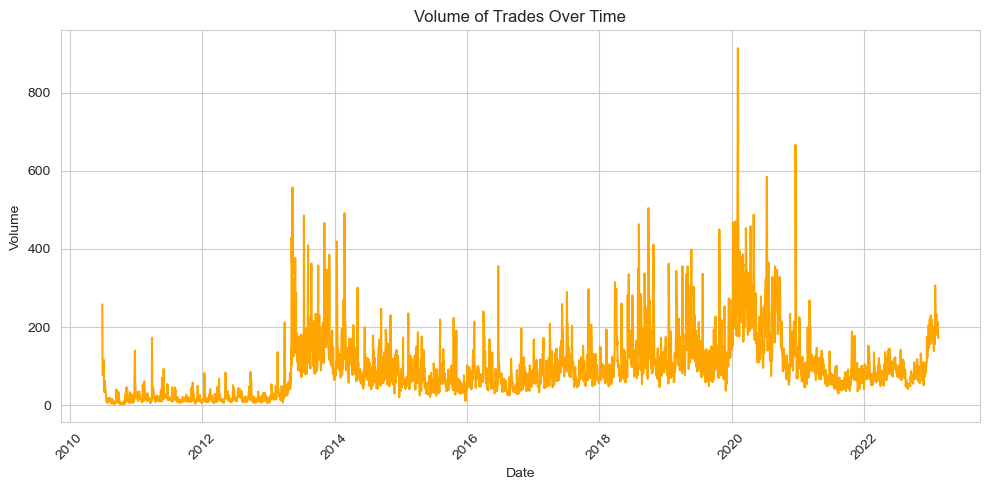

In [52]:
#  'Volume' data.
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Volume'], color='orange')
plt.title('Volume of Trades Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

### <a name="data-prep"></a>3.Creating a New Feature (Python + Domain knowledge):
    1. Use 'Close' to create the 'Prediction' for customized days out into the future
Some more questions to keep in mind:
- Try using different features to create the 'Prediction'
- How many days do you want to predict

In [84]:


# Number of days into the future for the prediction
n_days = 30

# Create a new column for the target variable, shifted 'n_days' days up
df['Prediction'] = df['Close'].shift(-n_days)

# Now, let's remove the last `n_days` rows since they won't have a valid target value
df = df[:-n_days]

# Show the new DataFrame with the Prediction column
print(df[['Date', 'Close', 'Prediction']].tail())


#ndicates the closing price of the stock on specific dates in December 2022 and the corresponding
#'Prediction' column which shows what the closing price will be 30 days from each respective date

#For ex on the 21st of December, 2022, the closing price was 137.57, and the 'Prediction' indicates that 30 days later, the closing price would be 196.81.
#This trend of predicted prices continues for each subsequent date in your output.

#not a forecast but can be used as a label for training predictive models

           Date   Close  Prediction
3142 2022-12-21  137.57      196.81
3143 2022-12-22  125.35      201.29
3144 2022-12-23  123.15      207.32
3145 2022-12-27  109.10      196.89
3146 2022-12-28  112.71      194.64


### <a name="data-prep"></a>4.Building Basic Model (ML + Python):
    1. Split the data
    2. Use the Linear Regression Model
    3. Visualize prediction 


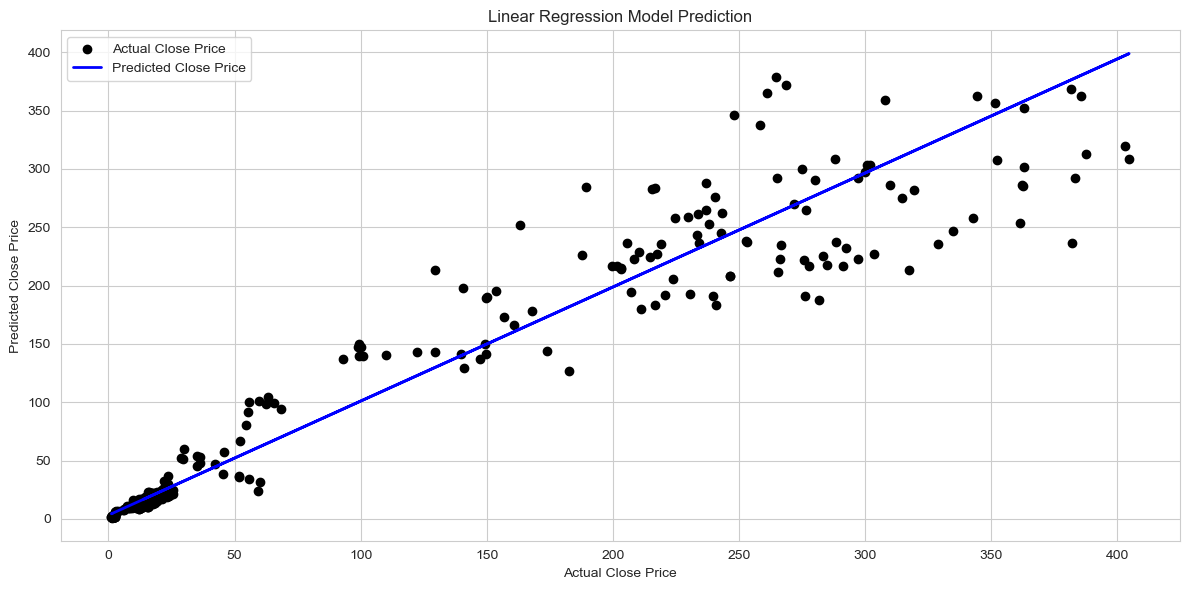

In [85]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_cleaned = df.copy().dropna()

# Define the features and target variable using the copied DataFrame
X = df_cleaned[['Close']]  # Features are usually in a DataFrame
y = df_cleaned['Prediction']  # Target is usually a Series

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
predictions = lr.predict(X_test)

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Close Price')
plt.plot(X_test, predictions, color='blue', linewidth=2, label='Predicted Close Price')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Linear Regression Model Prediction')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


 #linear regression model that takes the closing price and uses it to predict the closing price 30 days in the future


#Each black dot represents an actual data point from the testing set: the actual closing price of the stock on a given day.

#The blue line represents the predictions from the Linear Regression model. If a dot lies exactly on the blue line, it means the prediction for that day was perfectly accurate


In [55]:


# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 525.4815155036761
R-squared: 0.9378908081142079
